In [24]:
import numpy as np
from numpy import genfromtxt
import GPy
import pandas as pd
from matplotlib import pyplot as plt
GPy.plotting.change_plotting_library("matplotlib")
from IPython.display import display

In [25]:
#loading the data.
path = r"C:\Users\mikep\Desktop\project\data\final"

Xtrain = genfromtxt(path+"\Xtrain.csv", delimiter=',', skip_header=1)
Xtest = genfromtxt(path+"\Xtest.csv", delimiter=',', skip_header=1)

Ytrain = genfromtxt(path+"\Ytrain.csv", delimiter=',', skip_header=1)
Ytest = genfromtxt(path+"\Ytest.csv", delimiter=',', skip_header=1)

print(Ytrain)

[ 49.41187269 -21.79548554  79.75486465 -84.40203453 -88.67659358
 102.1569626   30.14611754 100.8856516   31.47176299 -85.0725798
  37.54366685  26.60744689  68.77149171  20.27608385 -69.54711423
 -54.7220702  -90.47079843   3.37459845  24.01723344 -79.73107694]


In [26]:
#further preprocessing
Ytrain = np.array([Ytrain]).T
Ytest = np.array([Ytest]).T

print(Ytrain)

[[ 49.41187269]
 [-21.79548554]
 [ 79.75486465]
 [-84.40203453]
 [-88.67659358]
 [102.1569626 ]
 [ 30.14611754]
 [100.8856516 ]
 [ 31.47176299]
 [-85.0725798 ]
 [ 37.54366685]
 [ 26.60744689]
 [ 68.77149171]
 [ 20.27608385]
 [-69.54711423]
 [-54.7220702 ]
 [-90.47079843]
 [  3.37459845]
 [ 24.01723344]
 [-79.73107694]]


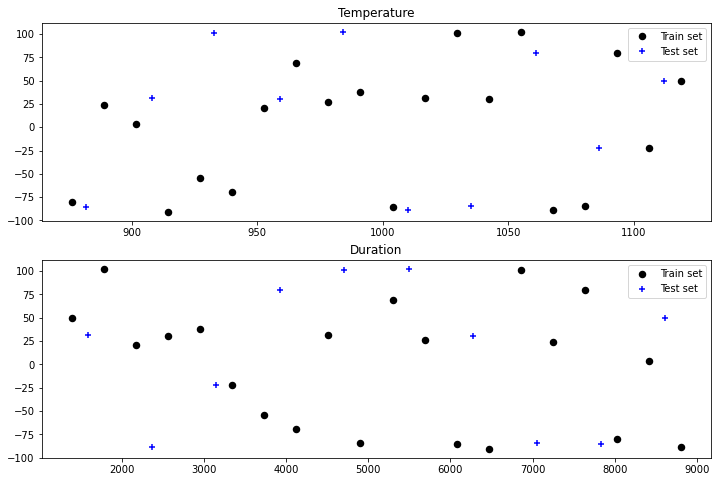

In [27]:
#visualizing data

#xlim = (0,100); ylim = (0,50)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#ax1.set_xlim(xlim)
ax1.set_title('Temperature')
ax1.plot(Xtrain[:,0], Ytrain,'ko',mew=1.5,label='Train set')
ax1.plot(Xtest[:,0], Ytest,'b+',mew=1.5,label='Test set')
ax1.legend()
ax2 = fig.add_subplot(212)
#ax2.set_xlim(xlim)
ax2.set_title('Duration')
ax2.plot(Xtrain[:,1], Ytrain,'ko',mew=1.5,label='Train set')
ax2.plot(Xtest[:,1], Ytest,'b+',mew=1.5,label='Test set')
ax2.legend()

{'covariance': [<matplotlib.contour.QuadContourSet at 0x1e4db74d790>]}

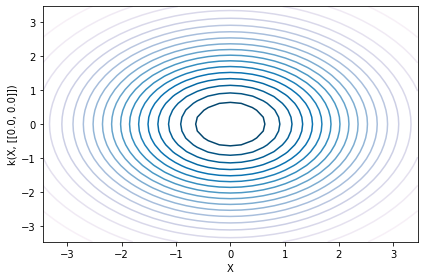

In [34]:
# SE - ARD Kernel

k = GPy.kern.RBF(input_dim=2, lengthscale=2, ARD=True)
k.plot(cmap="PuBu")

#k2 = GPy.kern.RBF(2, ARD=True)

#k_prod = k1 * k2
#k_prod.plot(cmap="PuBu_r")

{'covariance': [<matplotlib.contour.QuadContourSet at 0x1e4db819100>]}

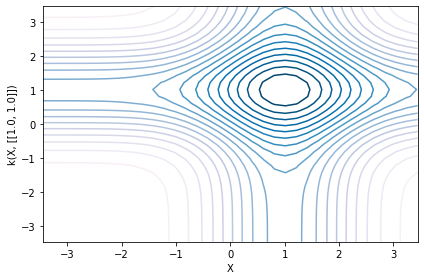

In [35]:
# Additive Kernel

k3 = GPy.kern.RBF(1, active_dims=[0])
k4 = GPy.kern.RBF(1, active_dims=[1])

k_add = k3 + k4
k_add.plot(cmap="PuBu")

A change in the parameters of the additive kernel translates into changes in the constituent kernels.

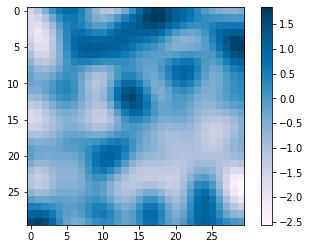

In [36]:
#plotting function for kernel

def plot_sample(k):
    xx, yy = np.mgrid[-10:10:30j, -10:10:30j]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
    plt.imshow(s.reshape(*xx.shape), interpolation='nearest', cmap="PuBu")
    plt.colorbar()

plot_sample(k)

In [37]:
# regression models
model = GPy.models.GPRegression(Xtrain, Ytrain, k)
#m_add = GPy.models.GPRegression(Xtrain, Ytrain, k_add)

In [38]:
display(model)
print(model.rbf.lengthscale)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,"(2,)",+ve,
Gaussian_noise.variance,1.0,+ve,


  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     2.00000000  |      +ve      |        
  [1]    |                     2.00000000  |      +ve      |        


In [41]:
# optimization
model.optimize(messages=True, max_f_eval = 5000)
model.optimize_restarts(num_restarts = 50)

Optimization restart 1/50, f = 111.83509103248014
Optimization restart 2/50, f = 111.83512619411948
Optimization restart 3/50, f = 111.83509171114964
Optimization restart 4/50, f = 111.83509408891379
Optimization restart 5/50, f = 111.8351017521192
Optimization restart 6/50, f = 111.83509187391765
Optimization restart 7/50, f = 111.83513003799538
Optimization restart 8/50, f = 111.83511721725947
Optimization restart 9/50, f = 111.83510445217703
Optimization restart 10/50, f = 111.83511407157906
Optimization restart 11/50, f = 111.83509170676636
Optimization restart 12/50, f = 111.83509456609765
Optimization restart 13/50, f = 111.83511735951159
Optimization restart 14/50, f = 111.83515145115776
Optimization restart 15/50, f = 111.8350942178189
Optimization restart 16/50, f = 111.83509199176557
Optimization restart 17/50, f = 111.83509737555644
Optimization restart 18/50, f = 111.83509097269429
Optimization restart 19/50, f = 111.83516831777759
Optimization restart 20/50, f = 111.835091

In [42]:
display(model)
print(model.rbf.lengthscale)

GP_regression.,value,constraints,priors
rbf.variance,1578.9979609496047,+ve,
rbf.lengthscale,"(2,)",+ve,
Gaussian_noise.variance,2631.775530842615,+ve,


  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     1.36487498  |      +ve      |        
  [1]    |                     0.13362718  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection object at 0x000001E4DAB84EB0>], 'gpmean': [<matplotlib.contour.QuadContourSet object at 0x000001E4D8D7C790>]}


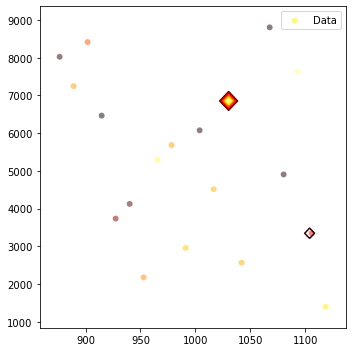

In [50]:
fig = model.plot(figsize=(5, 5), dpi=100)
print(fig)

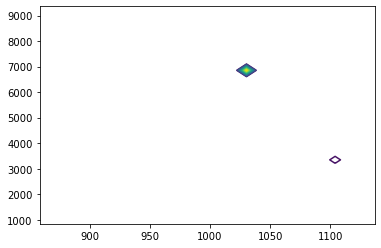

In [51]:
plot = fig['gpmean'][0]
plt.contour(plot)

In [45]:
display(GPy.plotting.show(plot, filename='mean-gp'))

AttributeError: 'QuadContourSet' object has no attribute 'figure'

In 2D plots, only the mean is shown.

## Plotting slices
To see the uncertaintly associated with the above predictions, we can plot slices through the surface. this is done by passing the optional `fixed_inputs` argument to the plot function. `fixed_inputs` is a list of tuples containing which of the inputs to fix, and to which value.

To get horixontal slices of the above GP, we'll fix second (index 1) input to -1, 0, and 1.5:

In [46]:
def plot_2outputs(m,xlim,ylim):
    fig = plt.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    model.plot(plot_limits=xlim, fixed_inputs=[(1,0)], which_data_rows=slice(0,100),ax=ax1)
    ax1.plot(Xtrain[:, 0], Ytrain, 'rx', mew=1.5)
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim, fixed_inputs=[(1,1)], which_data_rows=slice(100,200),ax=ax2)
    ax2.plot(Xtrain[:,1], Ytrain,'rx', mew=1.5)

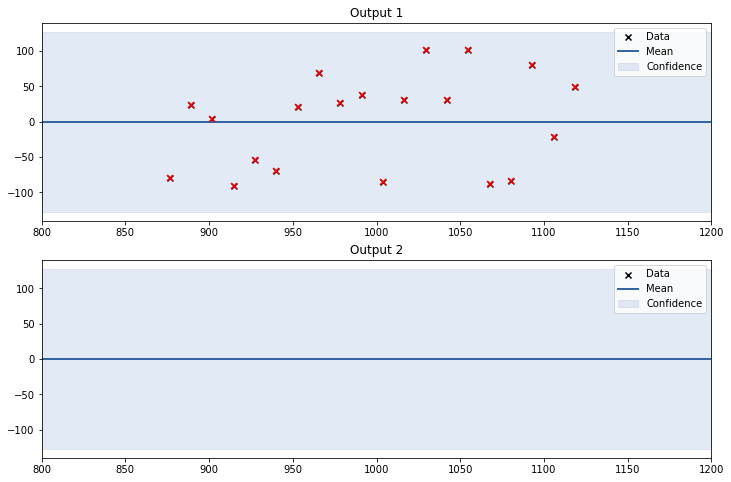

In [48]:
plot_2outputs(model, xlim=(800, 1200), ylim=(1000, 9000))

In [ ]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1)
                        #shared_xaxes=True,
                        #subplot_titles=('slice at -1', 
                                        #'slice at 0', 
                                        #'slice at 1.5', 
                                        #)
                                    #)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=False)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

The data look strange here: we're seeing slices of the GP, but all the data are displayed, even though they might not be close to the current slice.

To get vertical slices, we simply fixed the other input. We'll turn the display of data off also:

In [ ]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1) 
                        #subplot_titles=('slice at -1', 
                                        #'slice at 0', 
                                        #'slice at 1.5', 
                                        #)
                            #)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=False)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')

You can find a host of other plotting options in the `m.plot` docstring. `Type m.plot?<enter>` to see. 